In [1]:
import sys
sys.path.append('../..')
import ugent

In [2]:
from pyslise2d import Pyslise2D
import numpy as np
from math import sqrt, log10, log

f = 1/(2*sqrt(5))
def V(x, y):
    return x*x + y*y + f * y * (x*x- y*y/3)

p = Pyslise2D(V, -6,6, -6,6, x_symmetric=True, tolerance=1e-9, N=28, steps_per_sector=1)

In [3]:
from pyslise2d import Pyslise2D
from math import sqrt

def V(x, y):
    return x*x + y*y + 1/(6*sqrt(5)) * y * (3*x*x- y*y)

problem = Pyslise2D(V, -6,6, -6,6, tolerance=1e-8)
result = problem.eigenvaluesByIndex(0, 16)
result 

[(0, 1.9971895321108668, 1),
 (1, 3.980153534829174, 2),
 (3, 5.912485961079439, 1),
 (4, 5.970652738545486, 2),
 (6, 7.851927628560736, 2),
 (8, 7.964834589533214, 1),
 (9, 7.971522124859306, 1),
 (10, 9.740287178560719, 1),
 (11, 9.797290912498784, 2),
 (13, 9.972502537865937, 2),
 (15, 11.63405595784207, 2)]

In [6]:
values = [
    0.998595, 1.990077, 2.956243, 2.985326, 
    3.925964, 3.982417, 3.985761, 4.870144,
    4.898644, 4.986251, 5.817019, 5.817027, 5.867019,
]

for ixaru, (index, toon, mult) in zip(values, result):
    err, err_e = f"{abs(toon/2-ixaru):.1e}".split("e")
    head = " = ".join(f"E_{{{i}}}" for i in range(index, index+mult))
    print(f"${head}$ & ${ixaru}$ & ${toon/2:.13}$ & ${err}({int(err_e)})$ \\\\")

$E_{0}$ & $0.998595$ & $0.9985947660615$ & $2.3(-7)$ \\
$E_{1} = E_{2}$ & $1.990077$ & $1.990076767496$ & $2.3(-7)$ \\
$E_{3}$ & $2.956243$ & $2.956242980541$ & $1.9(-8)$ \\
$E_{4} = E_{5}$ & $2.985326$ & $2.985326368501$ & $3.7(-7)$ \\
$E_{6} = E_{7}$ & $3.925964$ & $3.925963810668$ & $1.9(-7)$ \\
$E_{8}$ & $3.982417$ & $3.982417294749$ & $2.9(-7)$ \\
$E_{9}$ & $3.985761$ & $3.98576106245$ & $6.2(-8)$ \\
$E_{10}$ & $4.870144$ & $4.870143588975$ & $4.1(-7)$ \\
$E_{11} = E_{12}$ & $4.898644$ & $4.898645455623$ & $1.5(-6)$ \\
$E_{13} = E_{14}$ & $4.986251$ & $4.986251267496$ & $2.7(-7)$ \\
$E_{15}$ & $5.817019$ & $5.817019082757$ & $8.3(-8)$ \\
$E_{16}$ & $5.817027$ & $5.81702797735$ & $9.8(-7)$ \\


In [5]:
best_known = 2*np.array([0.99859477260462, 1.99007676008316, 1.99007676008316, 2.95624298898781, 2.98532642806441, 2.98532642806442, 3.92596372109113, 3.92596372109114, 3.98241728327456, 3.98576092607719, 4.87014400547251, 4.89864420444642, 4.89864420444642, 4.98625101494171, 4.98625101494172, 5.81701909971053, 5.81701909971054, 5.86701480916528, 5.88144609873667, 5.99132695571450, 5.99132695571450, 6.73791623075037, 6.76486656303911, 6.76486656303911, 6.85343062732831, 6.85343062732831, 6.99893192820090, 6.99938690825129, 7.65948550690946, 7.65948550690947, 7.69772136553152, 7.73688473693607, 7.83273518682762, 7.83273518682763, 8.00942477463143, 8.00942477463144, 8.55402322299586, 8.57635148658287, 8.57635148658294, 8.67792887113521, 8.67792887113523, 8.81132713081544, 8.81518847088363, 9.02172330707064, 9.02172330707064, 9.44405461567860])
best_known

array([ 1.99718955,  3.98015352,  3.98015352,  5.91248598,  5.97065286,
        5.97065286,  7.85192744,  7.85192744,  7.96483457,  7.97152185,
        9.74028801,  9.79728841,  9.79728841,  9.97250203,  9.97250203,
       11.6340382 , 11.6340382 , 11.73402962, 11.7628922 , 11.98265391,
       11.98265391, 13.47583246, 13.52973313, 13.52973313, 13.70686125,
       13.70686125, 13.99786386, 13.99877382, 15.31897101, 15.31897101,
       15.39544273, 15.47376947, 15.66547037, 15.66547037, 16.01884955,
       16.01884955, 17.10804645, 17.15270297, 17.15270297, 17.35585774,
       17.35585774, 17.62265426, 17.63037694, 18.04344661, 18.04344661,
       18.88810923])

In [16]:
eigs = []
for i, E, m in result:
    for _ in range(m):
        eigs.append(E)

np.array(eigs) - best_known[:len(eigs)]

array([-1.30983733e-08,  1.46628540e-08,  1.46628540e-08, -1.68961805e-08,
       -1.17583333e-07, -1.17583354e-07,  1.86378476e-07,  1.86378456e-07,
        2.29840937e-08,  2.72704926e-07, -8.32384302e-07,  2.50360594e-06,
        2.50360594e-06,  5.07982516e-07,  5.07982497e-07,  1.77584210e-05,
        1.77584210e-05])

In [3]:
Es = p.eigenvaluesByIndex(0,20)
Es

[(0, 1.9971895451771744, 1),
 (1, 3.9801535206968977, 2),
 (3, 5.912485984066725, 1),
 (4, 5.970652855270173, 2),
 (6, 7.851927487521528, 2),
 (8, 7.964834601646065, 1),
 (9, 7.9715218140862465, 1),
 (10, 9.740288716814117, 1),
 (11, 9.797289313811003, 2),
 (13, 9.97250214106436, 2),
 (15, 11.634055123000202, 2),
 (17, 11.734039343719356, 1),
 (18, 11.762892393942112, 1),
 (19, 11.98265441848472, 2)]

In [4]:
for i, E, m in Es:
    print(f"E_{i} ({m}) = {E/2:.9f}  ({p.eigenvalueError(E):.1e})")

E_0 (1) = 0.998594773  (6.6e-11)
E_1 (2) = 1.990076760  (6.8e-11)
E_3 (1) = 2.956242992  (1.2e-10)
E_4 (2) = 2.985326428  (1.7e-10)
E_6 (2) = 3.925963744  (2.2e-10)
E_8 (1) = 3.982417301  (2.1e-10)
E_9 (1) = 3.985760907  (1.9e-10)
E_10 (1) = 4.870144358  (1.7e-10)
E_11 (2) = 4.898644657  (1.8e-10)
E_13 (2) = 4.986251071  (2.5e-10)
E_15 (2) = 5.817027562  (2.3e-10)
E_17 (1) = 5.867019672  (2.0e-10)
E_18 (1) = 5.881446197  (2.4e-10)
E_19 (2) = 5.991327209  (2.7e-10)


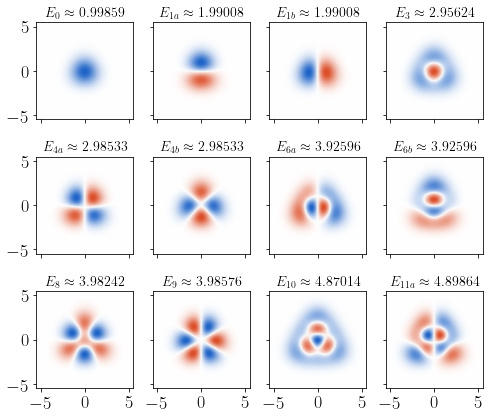

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc
import string
import numpy as np

x = np.linspace(-5.5, 5.5, 211)
y = np.linspace(-5.5, 5.5, 211)

rc('text', usetex=True)
rc('font', size=18)

cols = 4
rows = 3
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(8, 7), sharex=True, sharey=True)

fig_index = 0
for i, E, m in Es:
    for name, f in zip(string.ascii_lowercase, p.eigenfunction(E)):
        r = fig_index//cols
        c = fig_index%cols
        if r >= rows:
            break
        z = f(x, y)
        vmax = np.max(np.abs(z))
        ax = axes[r][c]
        ax.set_xticks(ticks=[-5,0,5])
        ax.set_yticks(ticks=[-5,0,5])
        ax.set_aspect(1)
        ax.set_title(f"$E_{{{i}{'' if m == 1 else name}}} \\approx {E/2:.5f}$", fontsize=14)
        ax.pcolormesh(x, y, z.T, shading='gouraud', vmin=-vmax, vmax=vmax, cmap=ugent.RdBu)
        fig_index += 1
    else:
        continue
    break

plt.savefig("henon_heiles_eigenfunctions.png", bbox_inches='tight', dpi=800)
plt.show()

In [5]:
import sys

In [6]:
sys.executable

'/opt/miniconda3/bin/python'